In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install imageai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 1.9 MB/s eta 0:00:00


In [ ]:
!pip3 install transformers torchvision torch opencv-python

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([0.9887, 0.9808, 0.9600, 0.9539, 0.9281, 0.9356, 0.9403, 0.7608],
       grad_fn=<IndexBackward0>) tensor([82,  5, 82, 82, 82, 82, 82, 82]) tensor([[227.0171, 316.0073, 338.2126, 453.4413],
        [ 79.4929,   0.7896, 639.4880, 182.4346],
        [441.9171, 393.0889, 562.0272, 470.0763],
        [443.2727, 326.9186, 553.3607, 405.1692],
        [331.5323, 387.5624, 437.7416, 461.8481],
        [115.8844, 300.2253, 238.1251, 452.5890],
        [334.0622, 319.4346, 445.0920, 402.6495],
        [439.1391, 266.1875, 537.8809, 333.2621]], grad_fn=<IndexBackward0>)


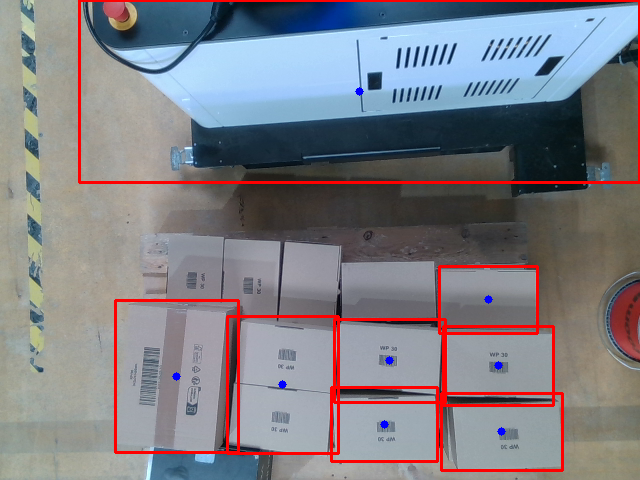

In [ ]:
from transformers import DetrImageProcessor, DetrForObjectDetection
from google.colab.patches import cv2_imshow
import torch
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Load image and model
image_path = "/content/drive/MyDrive/color_image.png"
image = Image.open(image_path)

processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# Post-process
target_sizes = torch.tensor([image.size[::-1]])  # (h, w)
results = processor.post_process_object_detection(outputs, threshold=0.7, target_sizes=target_sizes)[0]

# Get label map
id2label = model.config.id2label

# Draw boxes
image_cv = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
print(results["scores"],results["labels"],results["boxes"])
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    x1, y1, x2, y2 = [int(coord.item()) for coord in box]
    box = [int(i) for i in box.tolist()]
    label_t = id2label[label.item()]
    confidence = round(score.item(), 2)
    # Compute centroid
    cx = (x1 + x2) // 2
    cy = (y1 + y2) // 2

    # Draw centroid as a small red dot
    cv2.circle(image_cv, (cx, cy), 4, (0, 0, 255), -1)
    text = f"{confidence}"
    cv2.rectangle(image_cv, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 2)
    # Put label text
    # cv2.putText(
    #     image_cv,
    #     text,
    #     (box[0], box[1] - 10),  # Position above the box
    #     cv2.FONT_HERSHEY_SIMPLEX,
    #     0.5,  # Font scale
    #     (255, 0, 0),  # Font color (Blue in RGB)
    #     2,  # Thickness
    #     cv2.LINE_AA
    # )

#cv2.imwrite("output_detr.jpg", cv2.cvtColor(image_cv, cv2.COLOR_RGB2BGR))
cv2_imshow(cv2.cvtColor(image_cv, cv2.COLOR_RGB2BGR))